## 참고 글
- [크롬 개발자 도구 Console에서 Google Play Review 크롤링하기](https://zzsza.github.io/development/2019/03/12/crawling-in-developer-tools-console/)
- 크롤링한 review.json 업로드 필요

## 필요 라이브러리 설치
- konlpy

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy wordcloud


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,609 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [52.6 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
G

## 폰트 설치

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 57 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.0 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-extra all 20170925-1 [12.2 MB]
Get:4 http://archive.ubu

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import re
from bs4 import BeautifulSoup
import warnings
import numpy as np
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_json("review.json")

In [ ]:
df.head(3)

,body
0,"<div class=""d15Mdf bAhLNe""><div class=""xKpxId ..."
1,"<div class=""d15Mdf bAhLNe""><div class=""xKpxId ..."
2,"<div class=""d15Mdf bAhLNe""><div class=""xKpxId ..."


In [ ]:
p = re.compile(r'\d+')
def parser(body):
    bs = BeautifulSoup(body, 'html.parser')
    user_name = bs.find('span', class_='X43Kjb').text
    date = bs.find('span', class_='p2TkOb').text
    rating = bs.find('div', {'role':'img'})['aria-label']
    rating = p.findall(rating)[-1]
    review_text = bs.find('span', {'jsname':'bN97Pc'}).text
    return user_name, date, rating, review_text

In [ ]:
%%time
df['user_name'], df['date'], df['rating'], df['review_text'] = zip(*df['body'].map(parser))

CPU times: user 2.59 s, sys: 0 ns, total: 2.59 s
Wall time: 2.59 s


In [ ]:
del df["body"]

In [ ]:
df.head(3)

,user_name,date,rating,review_text
0,권수진,2019년 3월 10일,4,잘 사용하고 있습니다. 삼성 날씨앱에서는 보통이라고 뜨는데 미세미세 앱에서는 나쁨이...
1,Google 사용자,2019년 3월 11일,5,진작에 이 앱을 깔걸 그렜어요! 근데 친구들은 네이버가 더 정확하다고 자꾸그레요 ㅠ...
2,Hyunjoon Choi,2019년 3월 10일,5,미세먼지 수치를 정확하게 알 수 있어서 좋습니다. 그리고 최근에 전국 미세먼지 지도...


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y년 %m월 %d일')

In [ ]:
df = df.sort_values(by='date', ascending=False).reindex()

In [ ]:
print("최소 :", min(df['date'].value_counts().index))
print("최대 :", max(df['date'].value_counts().index))

최소 : 2019-02-27 00:00:00
최대 : 2019-03-12 00:00:00


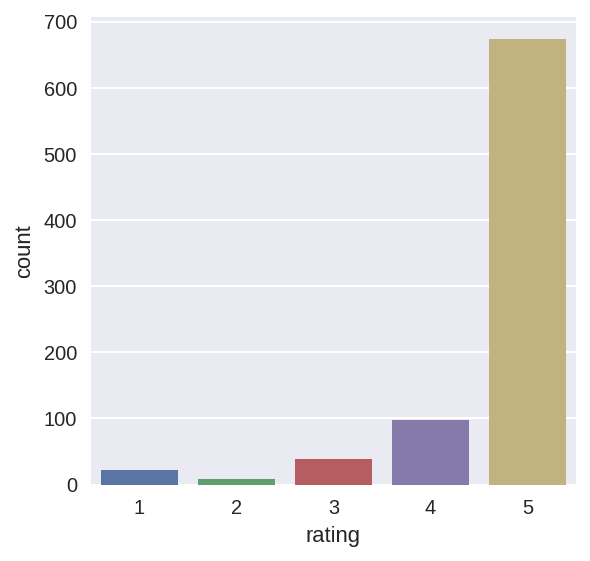

In [ ]:
sns.factorplot('rating',kind='count',data=df)

In [ ]:
df['rating'].value_counts()

5    673
4     98
3     39
1     22
2      8
Name: rating, dtype: int64

In [ ]:
high_rate_review = df[df['rating'] == '5']['review_text']
low_rate_review = df[df['rating'] <= '2']['review_text']

In [ ]:
len(high_rate_review)

673

In [ ]:
len(low_rate_review)

30

In [ ]:
low_rate_review[:10]

35     가끔 일기예보랑 전혀 다른 정보가 나오네요. 보통 수준인데 매우 나쁨이 나오고... ㅡㅡ
23     아니 뭐 몇시간마다 날짜별로 바뀜... 몇시간마다이렇게바꿀꺼면 뭐하러측정하고결과표내...
92     포털사이트와 달라요ㅜ 포털사이트에서는 미세먼지 보통이라고 나오는데 어플은 나쁘다고 ...
80                                       그만좀평가하라고해라 짜증난다
203                                              예보가안보여요
303                                                   이사
66     캐릭터가 너무 무섭게생겼어요 나빠서기분나쁜데 저캐릭터가 더 기분나쁘게 만들어요 캐릭...
538    갤럭시s9 파이 입니다. 파이로 업그레이드 후 앱이 호환이 잘 안되는것 같아요. 위...
114                     아니왜부산에미세먼지많다했는데딴엡으로했는데그것은미세먼지가좋음
9      지금 역삼은 상태 좋아서 멀리도 잘 보임. 다른 앱들은 미세먼지 정상으로 뜸. 근데...
Name: review_text, dtype: object

In [ ]:
high_rate_review = high_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))
low_rate_review = low_rate_review.apply(lambda x:re.sub('[^가-힣\s\d]',"",x))

In [ ]:
high_rate_review[:10]

234        신뢰도 높고 보기도 편하고 좋아요
510                        좋음
420                       베리굿
314              많이 도움이되고 있네요
235           전 유용하게 잘 쓰고 있어요
233             미세먼지를 꼭 확인할게요
310            생활 필수 앱 완전 좋아요
230            자세하고 정확하니 좋으네요
313              매일 이용합니다 좋아요
227    항상 아이를 위해 보고 있어요 감사합니다
Name: review_text, dtype: object

In [ ]:
low_rate_review[:10]

35           가끔 일기예보랑 전혀 다른 정보가 나오네요 보통 수준인데 매우 나쁨이 나오고 
23     아니 뭐 몇시간마다 날짜별로 바뀜 몇시간마다이렇게바꿀꺼면 뭐하러측정하고결과표내는지 ...
92       포털사이트와 달라요 포털사이트에서는 미세먼지 보통이라고 나오는데 어플은 나쁘다고 떠요
80                                       그만좀평가하라고해라 짜증난다
203                                              예보가안보여요
303                                                   이사
66     캐릭터가 너무 무섭게생겼어요 나빠서기분나쁜데 저캐릭터가 더 기분나쁘게 만들어요 캐릭...
538    갤럭시9 파이 입니다 파이로 업그레이드 후 앱이 호환이 잘 안되는것 같아요 위젯이 ...
114                     아니왜부산에미세먼지많다했는데딴엡으로했는데그것은미세먼지가좋음
9      지금 역삼은 상태 좋아서 멀리도 잘 보임 다른 앱들은 미세먼지 정상으로 뜸 근데 이...
Name: review_text, dtype: object

### 자연어 처리
- 단어 word count 정도만 체크
- 리뷰라 없을 것 같지만 1단어만 작성한 것은 제외

In [ ]:
low_tagger = Twitter()
high_tagger = Twitter()

In [ ]:
def get_word_low_rating(sentence):
    nouns = low_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

def get_word_high_rating(sentence):
    nouns = high_tagger.nouns(sentence)
    return [noun for noun in nouns if len(noun) > 1]

## 2점 이하의 word count

In [ ]:
low_countvector = CountVectorizer(tokenizer=get_word_low_rating, max_features=300)
low_tdf = low_countvector.fit_transform(low_rate_review)
low_words = low_countvector.get_feature_names()

In [ ]:
low_words[:5]

['가끔', '가안', '가요', '가장', '각각']

In [ ]:
count_mat = low_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
low_rating_word_count = list(zip(low_words, count))
low_rating_word_count = sorted(low_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
low_rating_word_count[:15]

[('미세먼지', 6),
 ('어플', 6),
 ('위젯', 6),
 ('미세', 4),
 ('신뢰', 4),
 ('실시간', 4),
 ('업데이트', 4),
 ('위치', 4),
 ('확인', 4),
 ('계속', 3),
 ('노트', 3),
 ('동기화', 3),
 ('보통', 3),
 ('사용', 3),
 ('새로고침', 3)]

## 5점 평점의 word count

In [ ]:
high_countvector = CountVectorizer(tokenizer=get_word_high_rating, max_features=300)
high_tdf = high_countvector.fit_transform(high_rate_review)
high_words = high_countvector.get_feature_names()

count_mat = high_tdf.sum(axis=0)
count = np.squeeze(np.asarray(count_mat))
high_rating_word_count = list(zip(high_words, count))
high_rating_word_count = sorted(high_rating_word_count, key=lambda t:t[1], reverse=True)

In [ ]:
high_rating_word_count[:15]

[('미세먼지', 137),
 ('미세', 83),
 ('어플', 59),
 ('확인', 56),
 ('정말', 44),
 ('사용', 37),
 ('기준', 35),
 ('요즘', 35),
 ('위젯', 35),
 ('실시간', 33),
 ('정보', 33),
 ('최고', 31),
 ('도움', 26),
 ('보기', 24),
 ('아주', 24)]

## WordCloud 그리기

In [ ]:
low_rating_document = low_rate_review.values
high_rating_document = high_rate_review.values

## 5점의 Word Cloud
- 단, 형용사나 명사만 체크하진 않고.. 단순한 word count
- 디벨롭할 수 있는 부분

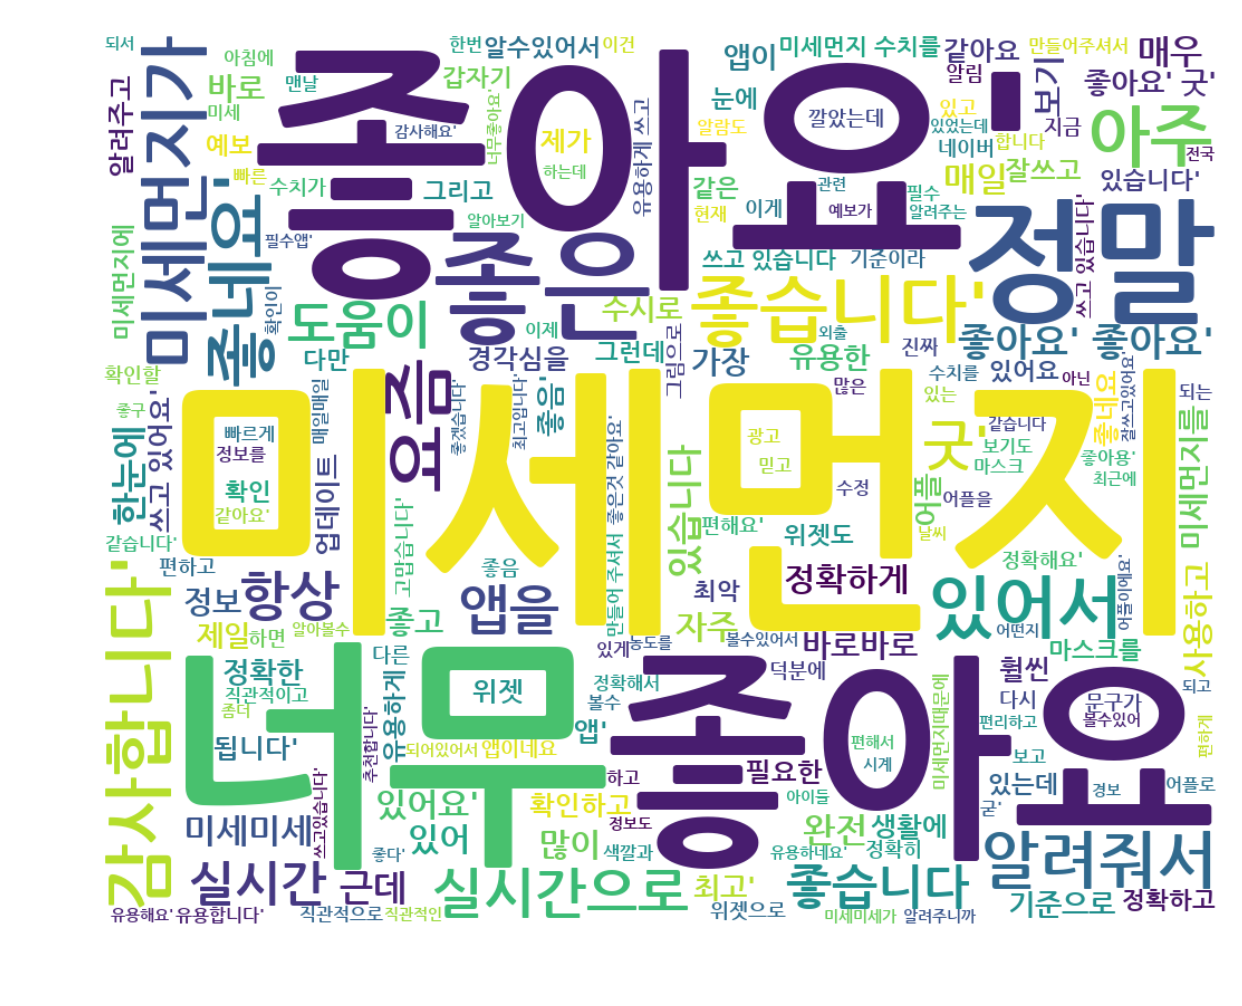

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(high_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2점 이하의 Word Cloud
- 단, 형용사나 명사만 체크하진 않고.. 단순한 word count
- 디벨롭할 수 있는 부분

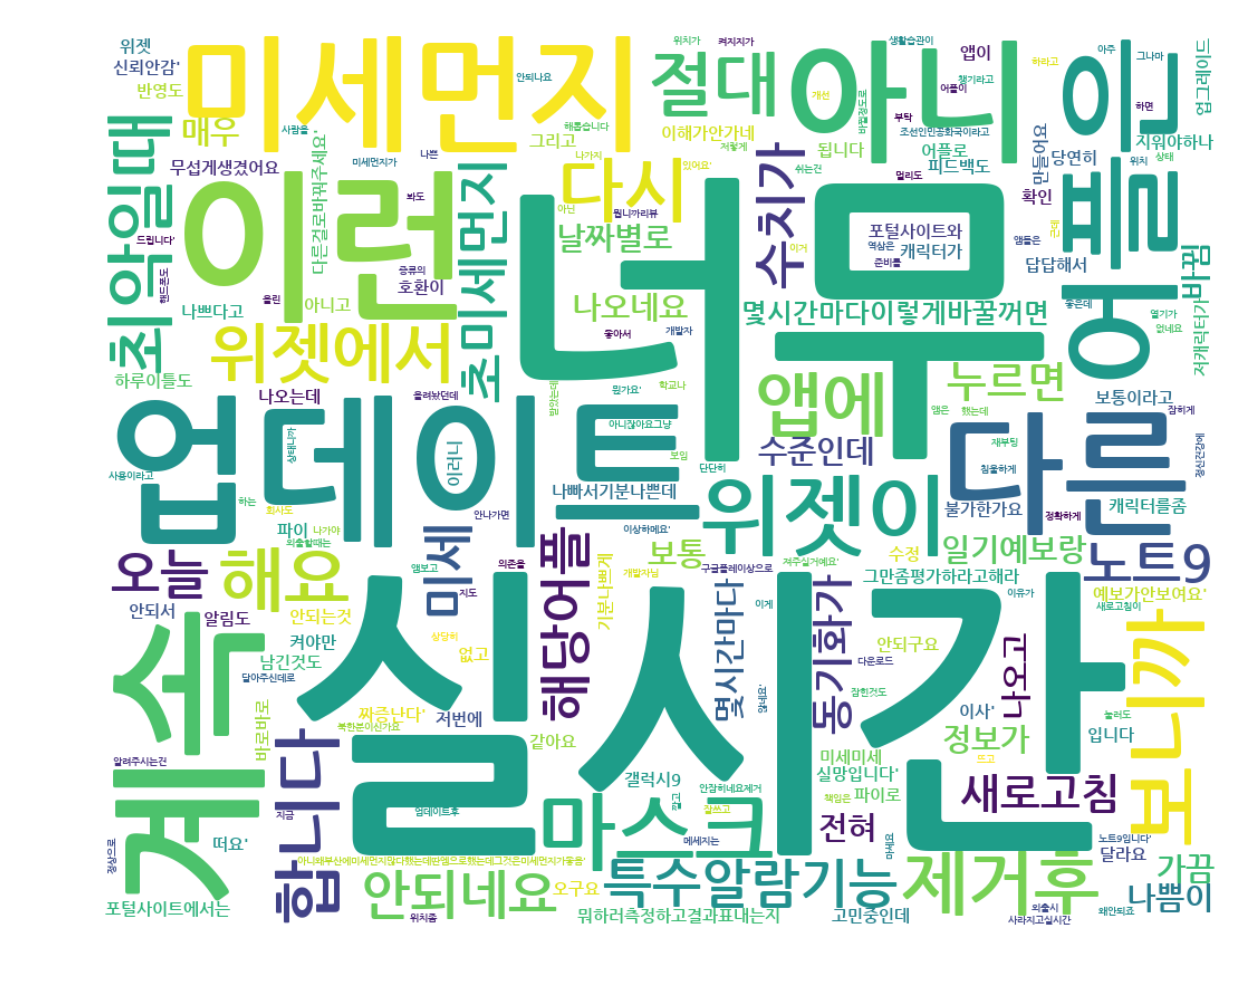

In [ ]:
wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path).generate(np.array2string(low_rating_document))
plt.figure(figsize=(6, 5), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()